\begin{equation}
\iint \limits_{\Omega} \left(sin(\pi x) \cdot cos^2(\pi y)\right) d\Omega,
\end{equation}

In [2]:
import numpy as np
import sympy as sym

def gaussian_integration_2D(p0, p1, p2, p3, fun, nx, ny):
    '''
        - p0, p1, p2, p3:
            Coordenadas de los punto (x,y) del cuadrilatero
        
        - fun:
            Funcion lambda f(x,y) a interpolar
            
        - nx, ny:
            Numero de puntos de cuadratura a utilizar en direccion
            x, y respectivamente.
    '''
    xi, wi = np.polynomial.legendre.leggauss(nx)
    yj, wj = np.polynomial.legendre.leggauss(ny)
    
    X = np.matrix([p0, p1, p2, p3])
    
    
    Nt = lambda r,s : 0.25*np.array([(1-r)*(1-s),
                                    (1+r)*(1-s),
                                    (1+r)*(1+s),
                                    (1-r)*(1+s)])
    
    Dt = lambda r,s : 0.25*np.array([[s-1, r-1],
                                     [1-s, -1-r],
                                     [1+s, 1+r],
                                     [-1-s, 1-r]
                                    ]).transpose()
    integral = 0
    for i in range(nx):
        rx = xi[i]
        wx = wi[i]
        for j in range(ny):
            sy = yj[j]
            wy = wj[j]
            
            J = Dt(rx, sy)*X
            det_J = np.linalg.det(J)
            
            x_vec = Nt(rx, sy)*X
            f_val = fun(x_vec[0,0], x_vec[0,1])
            integral += (f_val)*det_J*wx*wy
            
    return integral

Nueva malla

In [76]:
points = np.array([
    [0,0], 
    [5,0],
    [5,2],
    [0,2],
    ##
    [2,2],
    [7,2],
    [7,4],
    [2,4]
], dtype='float32')

rectangles = np.array([
    [0,1,2,3],
    [4,5,6,7],
], dtype='int32')

fun = lambda x, y: np.sin(np.pi*x)*np.cos(np.pi*y)**2

integral = 0

n = 20
z = 16

nx = 3
ny = 3

ps = []
rs = []

for m in range(len(rectangles)):
    xs = np.linspace(points[rectangles[m][0]][0], points[rectangles[m][1]][0], n+1)
    ys = np.linspace(points[rectangles[m][0]][1], points[rectangles[m][2]][1], z+1)
    for j in range(z+1):
        for i in range(n+1):
            ps.append([xs[i], ys[j]])
            
            if (j == z)|(i == n):
                pass
            else:
                n1 = (j*n + j + i) + m*(n+1)*(z+1)
                n2 = n1 + 1
                n3 = n2+n+1
                n4 = n3-1
                rs.append([n1, n2, n3, n4]) 

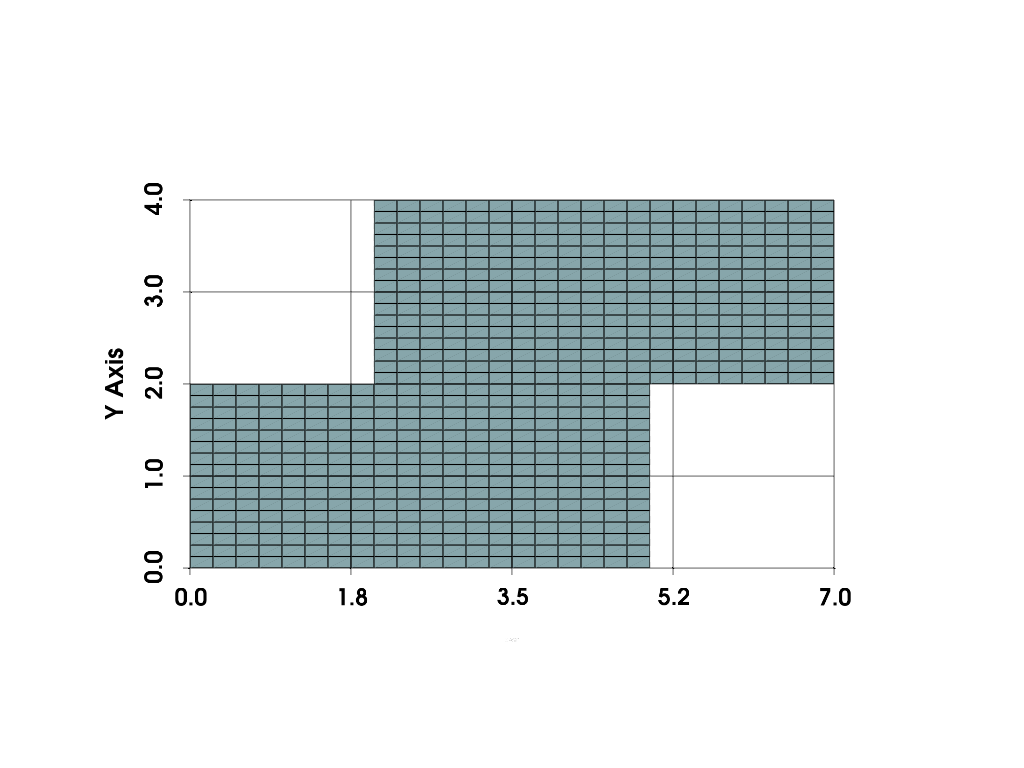

In [77]:
import pyvista as pv
import meshio

cells = [("quad", rs)]
points = ps
mesh = meshio.Mesh(points, cells)

mesh_pv = pv.wrap(mesh)

pl = pv.Plotter()
pl.add_mesh(mesh_pv, show_edges=True)
pl.view_xy()
pl.show_grid()
pl.show(jupyter_backend='pythreejs')

In [78]:
for i in range(len(rs)):
    p0 = ps[rs[i][0]]
    p1 = ps[rs[i][1]]
    p2 = ps[rs[i][2]]
    p3 = ps[rs[i][3]]

    integral_num = gaussian_integration_2D(p0, p1, p2, p3, fun, nx, ny)
    
    integral += integral_num
    
print(integral)

1.2732396961373476
